# Домашнее задание к лекции «Корреляция и корреляционный анализ»

## Задание
## Преподаватель: Олег Булыгин

### 1. Возьмите датасет Mortality and Water Hardness  
www.kaggle.com...r-hardness  

Дополнительно будет выложен в ЛК  
В этом датасете содержатся данные по средней годовой смертности на  
100000 населения и концентрации кальция в питьевой воде для 61  
большого города в Англии и Уэльсе. Города дополнительно поделены на  
северные и южные.  

### 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  
### 3 Задание.  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
dataset = pd.read_csv('Data/water.csv')

In [9]:
dataset.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


## 2 Задача - ответить на вопрос: "Есть ли связь между жёсткостью воды и средней годовой смертностью?"

### 1. Точечный график

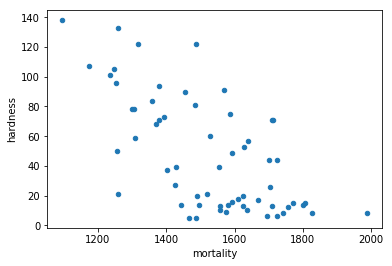

In [11]:
dataset.plot(kind='scatter', x='mortality', y='hardness')

### 2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [12]:
dataset[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [13]:
dataset[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


### 3. Построить модель линейной регрессии

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
X = dataset[['mortality']]
y = dataset[['hardness']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

#### Коэффициент детерминации:

In [33]:
model.score(X_test, y_test) 

0.4948982822876836

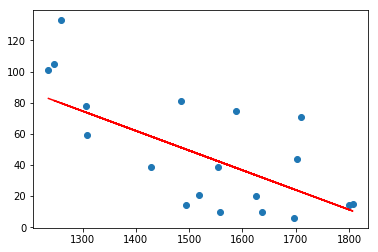

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [36]:
results = model.fit(X_train, y_train)

In [37]:
results

LinearRegression()

In [39]:
help(results)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [40]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        23:02:07   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

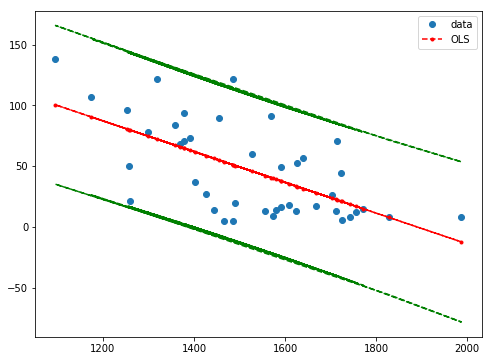

In [52]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

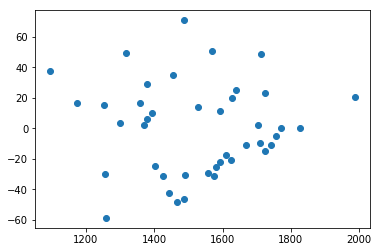

In [53]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <a list of 10 Patch objects>)

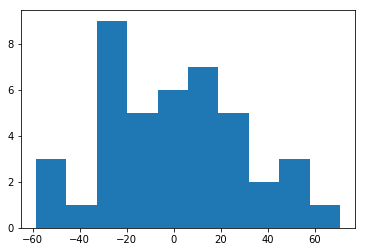

In [54]:
plt.hist(results.resid)

## Анализ для южных городов: